# 02 Bottleneck Attribution

Compute IO/CPU/Sort shares and visualize IO-bound vs CPU-bound behavior.


In [1]:
from pathlib import Path
import os
import pandas as pd
import numpy as np

ANALYZE_DIR = Path('../outputFiles/analyze').resolve()
REPORT_PREFIX = os.environ.get('REPORT_PREFIX', 'analysis_reports')
COLLECT_PREFIX = os.environ.get('COLLECT_PREFIX', REPORT_PREFIX)
REPORT_DIR = (ANALYZE_DIR / REPORT_PREFIX)
COLLECT_DIR = (ANALYZE_DIR / COLLECT_PREFIX)
STATS_CSV = None  # set to a specific file path if needed
TOPK_CSV = None   # set to a specific file path if needed

def pick_latest(pattern):
    files = sorted(COLLECT_DIR.glob(pattern))
    if not files:
        raise FileNotFoundError(f'No files matched: {pattern}')
    return files[-1]

stats_path = Path(STATS_CSV) if STATS_CSV else pick_latest('collected_stats_*.csv')
topk_path = Path(TOPK_CSV) if TOPK_CSV else pick_latest('collected_topk_*.csv')

print('stats:', stats_path)
print('topk :', topk_path)

stats_df = pd.read_csv(stats_path)
topk_df = pd.read_csv(topk_path)


stats: /home/gt/research/DiskANN/scripts/paramAnalysis/gridSearch/outputFiles/analyze/siftsmall01/collected_stats_siftsmall01_20260102_190313.csv
topk : /home/gt/research/DiskANN/scripts/paramAnalysis/gridSearch/outputFiles/analyze/siftsmall01/collected_topk_siftsmall01_20260102_190313.csv


In [2]:
# Load filtered dataset if available
filtered_path = (REPORT_DIR / 'tables' / 'filtered_stats.csv')
filtered_df = None
if filtered_path.exists():
    filtered_df = pd.read_csv(filtered_path)
    print('filtered:', filtered_path)
else:
    print('filtered not found:', filtered_path)


filtered: /home/gt/research/DiskANN/scripts/paramAnalysis/gridSearch/outputFiles/analyze/siftsmall01/tables/filtered_stats.csv


In [3]:
df = stats_df.copy()
df['io_share_p99'] = df['io_us_p99'] / df['latency_p99_us'].clip(lower=1)
df['cpu_share_p99'] = df['cpu_us_p99'] / df['latency_p99_us'].clip(lower=1)
df['sort_share_p99'] = df['sort_us_p99'] / df['latency_p99_us'].clip(lower=1)

if filtered_df is not None:
    filtered_df = filtered_df.copy()
    filtered_df['io_share_p99'] = filtered_df['io_us_p99'] / filtered_df['latency_p99_us'].clip(lower=1)
    filtered_df['cpu_share_p99'] = filtered_df['cpu_us_p99'] / filtered_df['latency_p99_us'].clip(lower=1)
    filtered_df['sort_share_p99'] = filtered_df['sort_us_p99'] / filtered_df['latency_p99_us'].clip(lower=1)


Saved figures to /home/gt/research/DiskANN/scripts/paramAnalysis/gridSearch/outputFiles/analyze/siftsmall01/figures


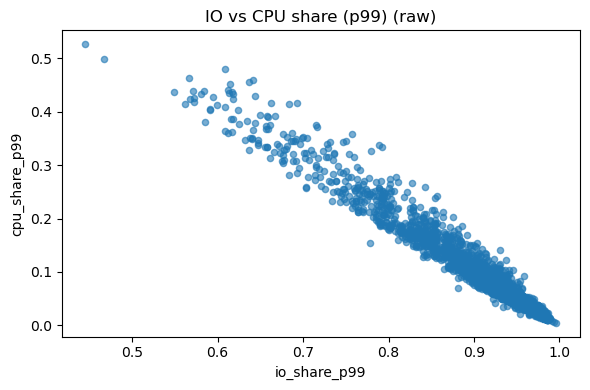

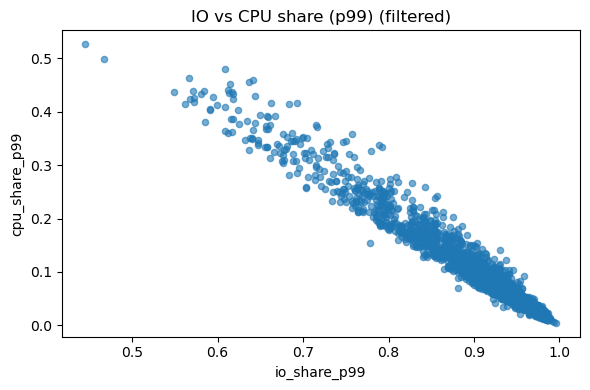

In [4]:
import matplotlib.pyplot as plt

fig_dir = (REPORT_DIR / 'figures')
fig_dir.mkdir(parents=True, exist_ok=True)

# Raw
ax = df.plot.scatter(x='io_share_p99', y='cpu_share_p99', alpha=0.6, figsize=(6, 4))
ax.set_title('IO vs CPU share (p99) (raw)')
plt.tight_layout()
plt.savefig(fig_dir / 'io_cpu_share_p99_raw.png', dpi=150)

# Filtered
if filtered_df is not None:
    ax = filtered_df.plot.scatter(x='io_share_p99', y='cpu_share_p99', alpha=0.6, figsize=(6, 4))
    ax.set_title('IO vs CPU share (p99) (filtered)')
    plt.tight_layout()
    plt.savefig(fig_dir / 'io_cpu_share_p99_filtered.png', dpi=150)

print('Saved figures to', fig_dir)


Saved figures to /home/gt/research/DiskANN/scripts/paramAnalysis/gridSearch/outputFiles/analyze/siftsmall01/figures


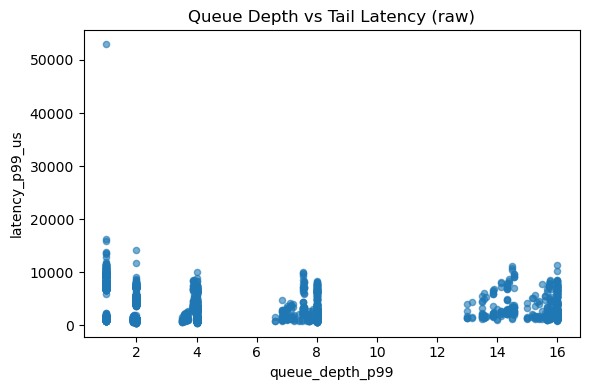

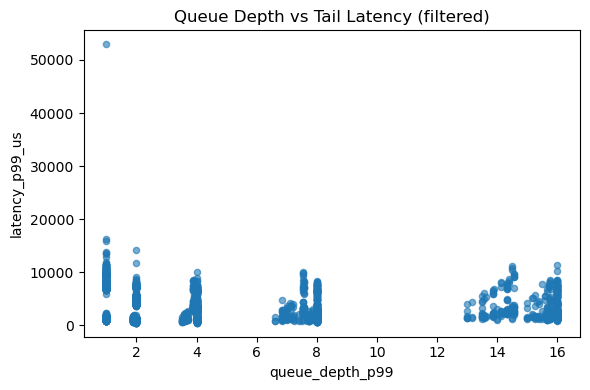

In [5]:
import matplotlib.pyplot as plt
fig_dir = (REPORT_DIR / 'figures')
fig_dir.mkdir(parents=True, exist_ok=True)

ax = df.plot.scatter(x='queue_depth_p99', y='latency_p99_us', alpha=0.6, figsize=(6, 4))
ax.set_title('Queue Depth vs Tail Latency (raw)')
plt.tight_layout()
plt.savefig(fig_dir / 'queue_vs_latency_p99_raw.png', dpi=150)

if filtered_df is not None:
    ax = filtered_df.plot.scatter(x='queue_depth_p99', y='latency_p99_us', alpha=0.6, figsize=(6, 4))
    ax.set_title('Queue Depth vs Tail Latency (filtered)')
    plt.tight_layout()
    plt.savefig(fig_dir / 'queue_vs_latency_p99_filtered.png', dpi=150)

print('Saved figures to', fig_dir)
